# **Introduction:**
In the vast expanse of agricultural landscapes worldwide, a plethora of fruits are cultivated, each boasting its own distinct characteristics and varieties. These characteristics, often discerned through external appearance attributes such as color, length, diameter, and shape, serve as fundamental indicators of a fruit's type and quality. However, the manual determination of fruit variety solely based on external features demands specialized expertise, proving to be a time-consuming and labor-intensive endeavor. In response to this challenge, the advent of machine learning offers a promising solution, leveraging algorithms to automate the classification process and alleviate the burden of manual inspection.

# **Problem Statement:**
The task of identifying the specific type of fruit solely through its external appearance poses a significant challenge due to the nuanced variations across different fruit varieties. This manual classification process demands considerable expertise and consumes substantial time and effort. In the context of date fruits, which encompass a diverse array of types including 'BERHI,' 'DEGLET,' 'DOKOL,' 'IRAQI,' 'ROTANA,' 'SAFAVI,' and 'SOGAY,' the need for efficient and accurate classification methods is paramount. Therefore, the primary problem addressed in this study revolves around automating the classification of date fruit types using machine learning techniques, specifically Artificial Neural Networks (ANNs).

# **Project Objective:**
The overarching objective of this study is to develop an ANN-based classification model capable of accurately categorizing different types of date fruits based on their external appearance features. By harnessing the power of machine learning, particularly ANNs, we aim to streamline and expedite the fruit classification process, reducing the dependency on manual expertise and minimizing the associated time and effort. Ultimately, the successful implementation of this model will facilitate enhanced efficiency and accuracy in fruit classification, benefiting stakeholders across the agricultural sector and contributing to the optimization of fruit production and distribution processes.

# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
import datetime
import platform
import warnings
warnings.filterwarnings('ignore')

## **Reading the Dataset**

In [ ]:
df=pd.read_excel("/content/Date_Fruit_Datasets.xlsx")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


# Data preprocessing

In [ ]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [ ]:
# Checking for the missing values
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

### Generating Matrix of Features (X) and Dependent Variable Vector(Y)

In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [ ]:
X=df.drop(['Class'], axis=1)
Y=df['Class']
X.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB'],
      dtype='object')

In [ ]:
#veryfying the number of unique values in our target column(Class)
class_values=df["Class"].unique()
class_valsum=df["Class"].nunique()

print(class_values)
print()
print(class_valsum)

['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']

7


In [ ]:
#Label encoding the column Class (target)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = df['Class']
Y = le.fit_transform(Y)


In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Artificial Neural Network**

In [ ]:
#Initialising ANN
ann= tf.keras.models.Sequential()

## Defining the Model Architecture

In [ ]:
# 2 hidden layers and 1 output layer
ann.add(tf.keras.layers.Dense(units=8,activation="relu")) #1st layer
ann.add(tf.keras.layers.Dense(units=8,activation="relu")) #2nd layer


ann.add(tf.keras.layers.Dense(units=7, activation="softmax")) #output layer

## Compiling the model

In [ ]:

ann.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Training and Evaluating the Model

In [ ]:
#Fitting ANN
Training_progress=ann.fit(X_train,Y_train,batch_size=35, epochs =81, validation_data=(X_test, Y_test))
print("The training has been successful")

Epoch 1/81
21/21 [==============================] - 2s 22ms/step - loss: 2.0963 - accuracy: 0.1142 - val_loss: 1.9373 - val_accuracy: 0.1944
Epoch 2/81
21/21 [==============================] - 0s 6ms/step - loss: 1.8554 - accuracy: 0.2312 - val_loss: 1.7324 - val_accuracy: 0.3833
Epoch 3/81
21/21 [==============================] - 0s 6ms/step - loss: 1.6856 - accuracy: 0.3942 - val_loss: 1.5801 - val_accuracy: 0.4778
Epoch 4/81
21/21 [==============================] - 0s 6ms/step - loss: 1.5580 - accuracy: 0.4680 - val_loss: 1.4487 - val_accuracy: 0.5333
Epoch 5/81
21/21 [==============================] - 0s 6ms/step - loss: 1.4440 - accuracy: 0.4986 - val_loss: 1.3348 - val_accuracy: 0.5556
Epoch 6/81
21/21 [==============================] - 0s 5ms/step - loss: 1.3417 - accuracy: 0.5376 - val_loss: 1.2372 - val_accuracy: 0.5722
Epoch 7/81
21/21 [==============================] - 0s 5ms/step - loss: 1.2549 - accuracy: 0.5877 - val_loss: 1.1617 - val_accuracy: 0.6333
Epoch 8/81
21/21 [=

## Visualization our model summary that describes the various layers defined in the model.

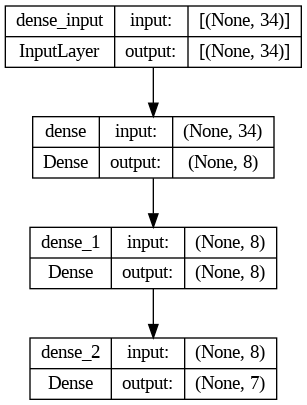

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## The Model Summary

In [ ]:
ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 280       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 415 (1.62 KB)
Trainable params: 415 (1.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Visualizing the training Accuracy and Loss progress from one epoch to another

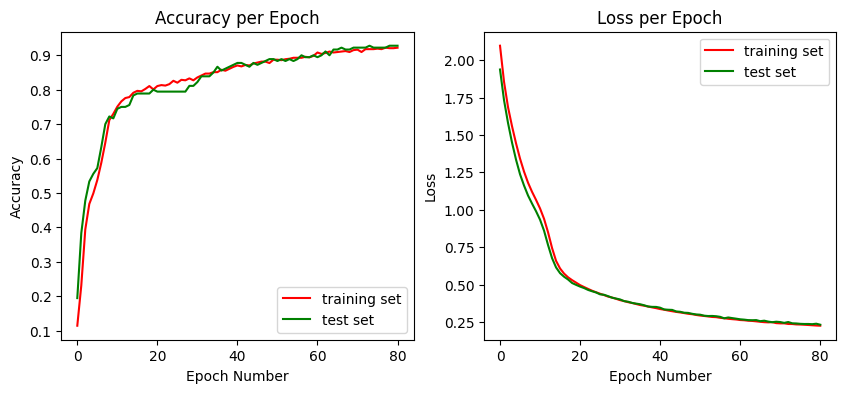

In [ ]:
import matplotlib.pyplot as plt

#the accuracy plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(Training_progress.history['accuracy'], color='red', label='training set')
axs[0].plot(Training_progress.history['val_accuracy'], color='green', label='test set')
axs[0].set_title("Accuracy per Epoch")
axs[0].set_xlabel('Epoch Number')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

#the loss plot
axs[1].plot(Training_progress.history['loss'], color='red', label='training set')
axs[1].plot(Training_progress.history['val_loss'], color='green', label='test set')
axs[1].set_title("Loss per Epoch")
axs[1].set_xlabel('Epoch Number')
axs[1].set_ylabel('Loss')
axs[1].legend()

## ANN Model prediction

In [ ]:
Y_pred_probs = ann.predict(X_test)

# Getting the index of the class with the highest probability for each sample
Y_pred_index = np.argmax(Y_pred_probs, axis=1)

# Decoding the predicted labels back to their original names
Y_pred_names = le.inverse_transform(Y_pred_index)

print("Predicted output in original names:")
print(Y_pred_names)

6/6 [==============================] - 0s 4ms/step
Predicted output in original names:
['DOKOL' 'SAFAVI' 'DOKOL' 'SOGAY' 'BERHI' 'DOKOL' 'IRAQI' 'DOKOL' 'DOKOL'
 'DEGLET' 'DEGLET' 'DOKOL' 'DOKOL' 'DOKOL' 'ROTANA' 'SOGAY' 'DEGLET'
 'SAFAVI' 'DEGLET' 'DEGLET' 'SAFAVI' 'ROTANA' 'DOKOL' 'ROTANA' 'SAFAVI'
 'DOKOL' 'IRAQI' 'SOGAY' 'BERHI' 'SAFAVI' 'SOGAY' 'DEGLET' 'DOKOL'
 'ROTANA' 'DOKOL' 'SAFAVI' 'BERHI' 'DOKOL' 'DOKOL' 'SAFAVI' 'DOKOL'
 'ROTANA' 'SAFAVI' 'SAFAVI' 'DEGLET' 'DEGLET' 'DEGLET' 'DOKOL' 'DOKOL'
 'SAFAVI' 'ROTANA' 'IRAQI' 'DOKOL' 'SOGAY' 'DOKOL' 'ROTANA' 'ROTANA'
 'DOKOL' 'DOKOL' 'BERHI' 'IRAQI' 'DEGLET' 'DOKOL' 'DOKOL' 'DOKOL' 'SOGAY'
 'DEGLET' 'DOKOL' 'ROTANA' 'ROTANA' 'DOKOL' 'DOKOL' 'ROTANA' 'SOGAY'
 'IRAQI' 'ROTANA' 'DOKOL' 'ROTANA' 'SAFAVI' 'ROTANA' 'DOKOL' 'DEGLET'
 'ROTANA' 'IRAQI' 'DOKOL' 'ROTANA' 'DOKOL' 'SAFAVI' 'IRAQI' 'DOKOL'
 'DOKOL' 'SAFAVI' 'SAFAVI' 'IRAQI' 'DEGLET' 'DOKOL' 'DOKOL' 'DOKOL'
 'DOKOL' 'ROTANA' 'ROTANA' 'IRAQI' 'DOKOL' 'SAFAVI' 'SAFAVI' 'ROTANA'
 'IR

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred_index)
accuracy


0.9277777777777778

### The model's prediction accuracy stands at approximately 92%, which is a commendable achievement.








# Plotting predictions for four samples

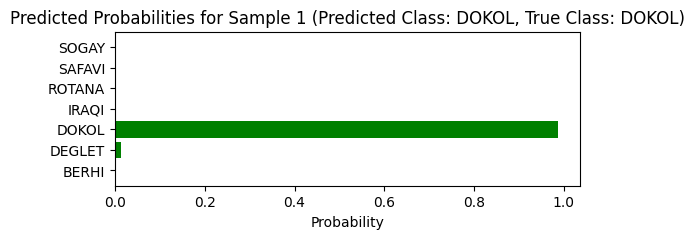

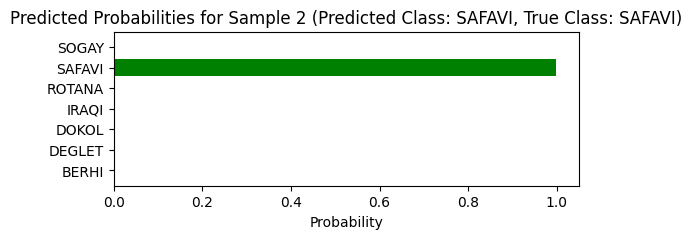

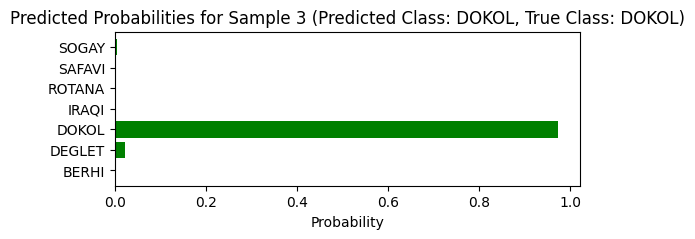

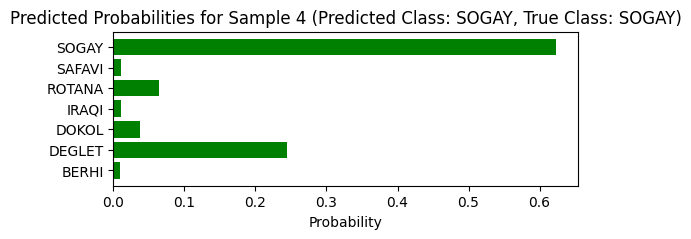

In [ ]:
# Plotting predictions for a few samples
num_samples_to_plot = 4
for i in range(num_samples_to_plot):
    plt.figure(figsize=(6, 2))
    plt.barh(range(len(Y_pred_probs[i])), Y_pred_probs[i], color='green')
    plt.yticks(range(len(Y_pred_probs[i])), le.classes_)  # Use class names as y-axis labels
    plt.xlabel('Probability')
    plt.title(f'Predicted Probabilities for Sample {i+1} (Predicted Class: {Y_pred_names[i]}, True Class: {le.inverse_transform([Y_test[i]])[0]})')
    plt.show()

# **Date Fruits ANN Classification Summary**

The observation that some date fruit types have prediction probabilities despite not being the true class suggests that additional features could improve classification accuracy. This insight extends beyond date fruits to encompass various other objects, including vegetables, fruits, and legumes. By incorporating more diverse and informative features into classification studies, it is anticipated that success rates can be enhanced across a wide range of classification tasks.

This understanding underscores the importance of feature selection and engineering in machine learning applications. By leveraging a comprehensive set of features that capture the nuances and intricacies of the objects being classified, models can achieve greater discriminative power and accuracy. Furthermore, this approach fosters adaptability and generalization, enabling models to effectively classify diverse objects beyond the scope of the training data.

In summary, the pursuit of improved classification performance entails not only refining existing features but also exploring new feature dimensions that encapsulate the inherent variability and complexity of the classification problem at hand. This holistic approach holds the potential to advance classification capabilities across various domains, contributing to more robust and reliable machine learning systems.





```
                                                                  Author:KANYI



